In [0]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from sklearn.metrics import silhouette_score as sil_score
from sklearn.metrics.pairwise import euclidean_distances

In [0]:
def dist(X, Y):
  d = (X**2).sum(axis=1)[np.newaxis].T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]
  return np.sqrt(d)


def dunn(X, labels):
  clusters = np.unique(labels).size
  if -1 in np.unique(labels):
    clusters -=1
  intercluster = 10000
  diameter = 0
  for i in range(clusters):
    diameter = max(np.max(dist(X[labels == i], X[labels == i])), diameter)
    for j in range(i+1, clusters):
      intercluster = min(np.min(dist(X[labels==i], X[labels==j])), intercluster)
  return intercluster/diameter

def DB_index(X,labels):
    k=np.unique(labels).size
    if -1 in np.unique(labels):
      k-=1
   
    clusters = [X[labels==i] for i in range(k)]
   
    centroids =[np.mean(clusters[i],axis=0) for i in range(k)]
   
    centroid_distance = euclidean_distances(centroids,centroids)
   
    intra_cluster = [np.mean(euclidean_distances(clusters[i],clusters[i])) for i in range(k)]
   
    res = np.sum([max(((intra_cluster[i] + intra_cluster[j]) / centroid_distance[i][j] for j in range(k) if i != j))
                  for i in range(k)]) / k
    return res

In [0]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels):
    plt_colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

    plt_K = np.unique(plt_labels).size

    for k in range(-1, plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    print('sil: ',sil_score(X, plt_labels))
    print('dunn: ', dunn(X, plt_labels))
    print('db: ', DB_index(X, plt_labels))
    plt.show()

1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

sil:  0.6727587578053784
dunn:  0.015798974903171743
db:  0.6326229026030089


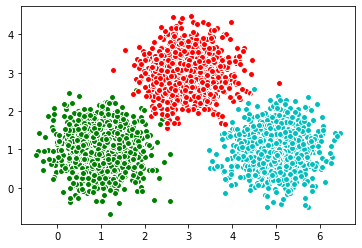

In [0]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
plotClustering(X, labels)


Grupowanie za pomocą KMeans

sil:  0.6734580192752578
dunn:  0.04700562905032969
db:  0.6316477977990259


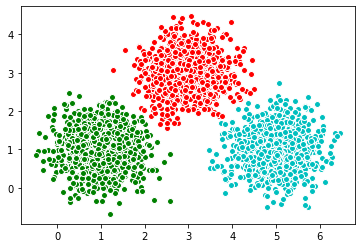

In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

plotClustering(X, k_means.labels_)
#sil_score(X, k_means.labels_)

Grupowanie za pomocą MiniBatchKMeans

sil:  0.6734737010022938
dunn:  0.03251356771842728
db:  0.6312513168305364


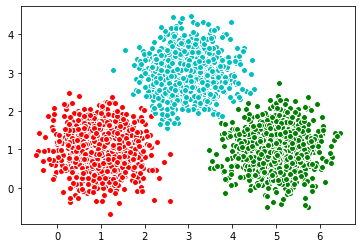

In [0]:
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

plotClustering(X, mini_batch_k_means.labels_)
#sil_score(X, mini_batch_k_means.labels_)

**Grupowanie za pomocą Birch bez wtórnego grupowania**

sil:  0.6734580192752578
dunn:  0.04700562905032969
db:  0.6316477977990259


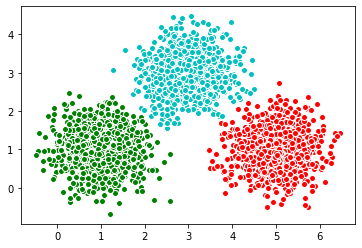

In [0]:
birch = Birch(threshold=1, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)
#sil_score(X, birch.labels_)

**Grupowanie za pomocą Birch z wtórnym grupowaniem**

sil:  0.6726175204311898
dunn:  0.01282371605398648
db:  0.631870950708699


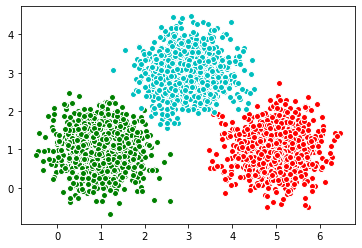

In [0]:
birch = Birch(threshold=0.25, n_clusters=3)
birch.fit(X)

plotClustering(X, birch.labels_)
#sil_score(X, birch.labels_)

**Grupowanie za pomocą DBScan**

sil:  0.5952718753483941
dunn:  0.2755722139039725
db:  0.5646692917938502


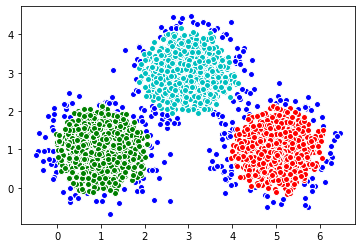

In [0]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_)
#sil_score(X, dbscan.labels_)

**2. Drugi zestaw danych**

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
Y = iris.data


df = pd.DataFrame(iris.data, columns = iris.feature_names)

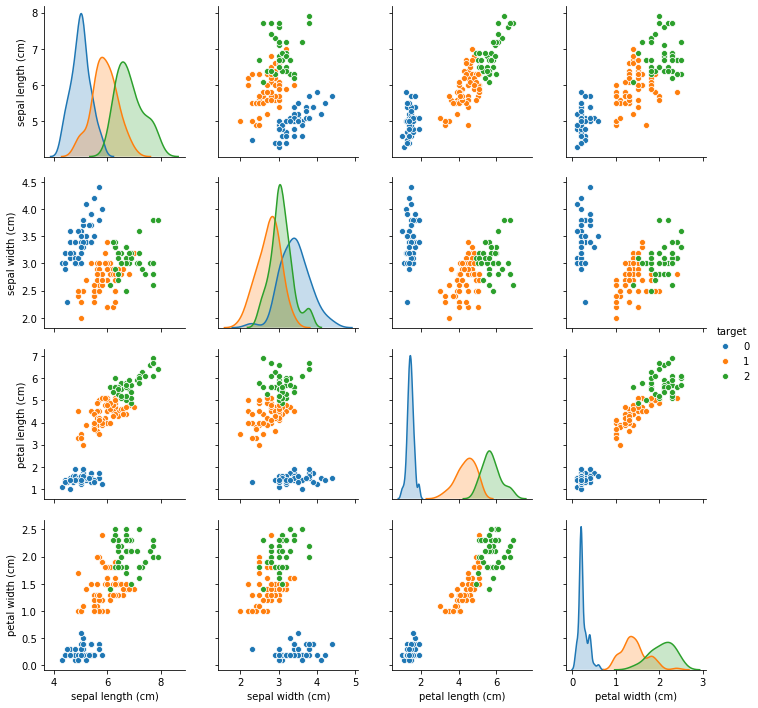

In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(Y)
df['target'] = k_means.labels_
sns.pairplot(df, hue='target', vars=iris.feature_names)

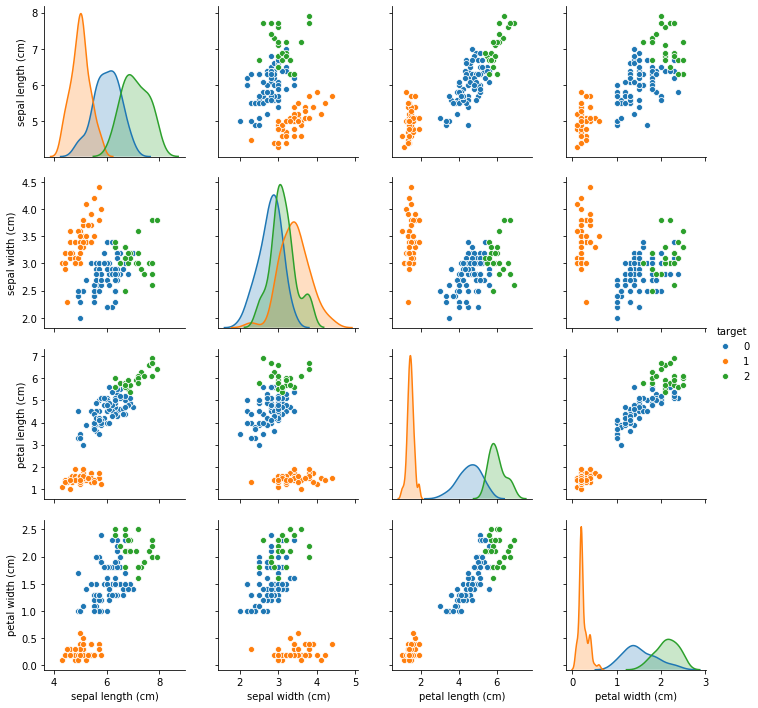

In [0]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(Y)

df['target'] = birch.labels_
sns.pairplot(df, hue='target', vars=iris.feature_names)

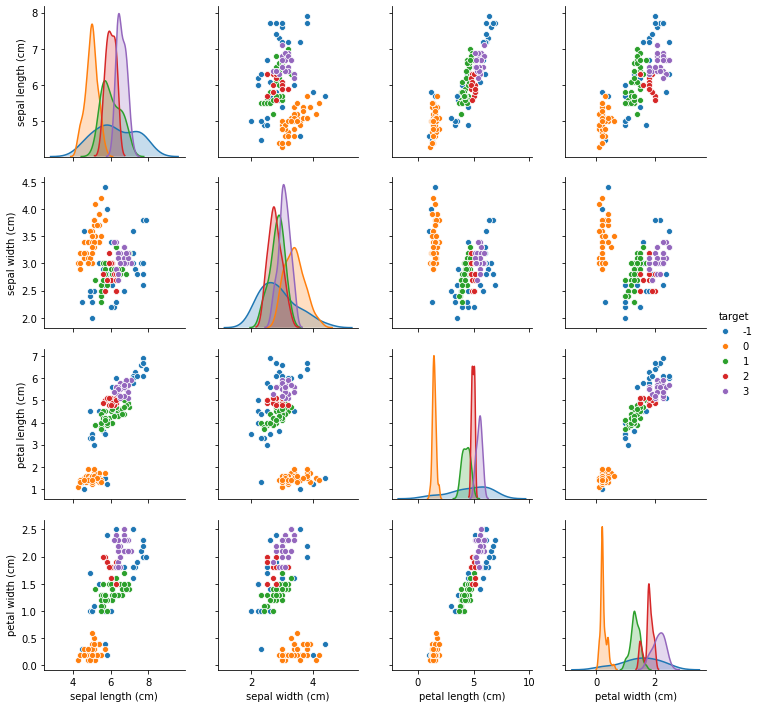

In [0]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(Y)

df['target'] = dbscan.labels_
sns.pairplot(df, hue='target', vars=iris.feature_names)